## Importing libraries

In [1]:
import os
import pandas as pd
import copy

### Setting the nice plot visuals

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

## Defining function that lets me slightly preprocess my dataset

In [3]:
def preprocess_dataset(df) : 
    df_output = copy.deepcopy(df)
    df_output.loc[:, "date"] = pd.to_datetime(df_output[["year", "month", "day", "hour"]])
    df_output.set_index("date", inplace=True)
    cols_to_aggregate = [col for col in df_output.columns if col.startswith("PM")]
    df_output.loc[:, "PM"] = df_output[cols_to_aggregate].mean(axis=1)
    df_output.drop(cols_to_aggregate, axis=1, inplace=True)
    df_output.drop(["year", "month", "day", "hour", "No"], axis=1, inplace=True)
    return df_output

## First visualizations : 

As most of the variables are time-distributed, I decided to plot them on 1 graph, with distinction to city;

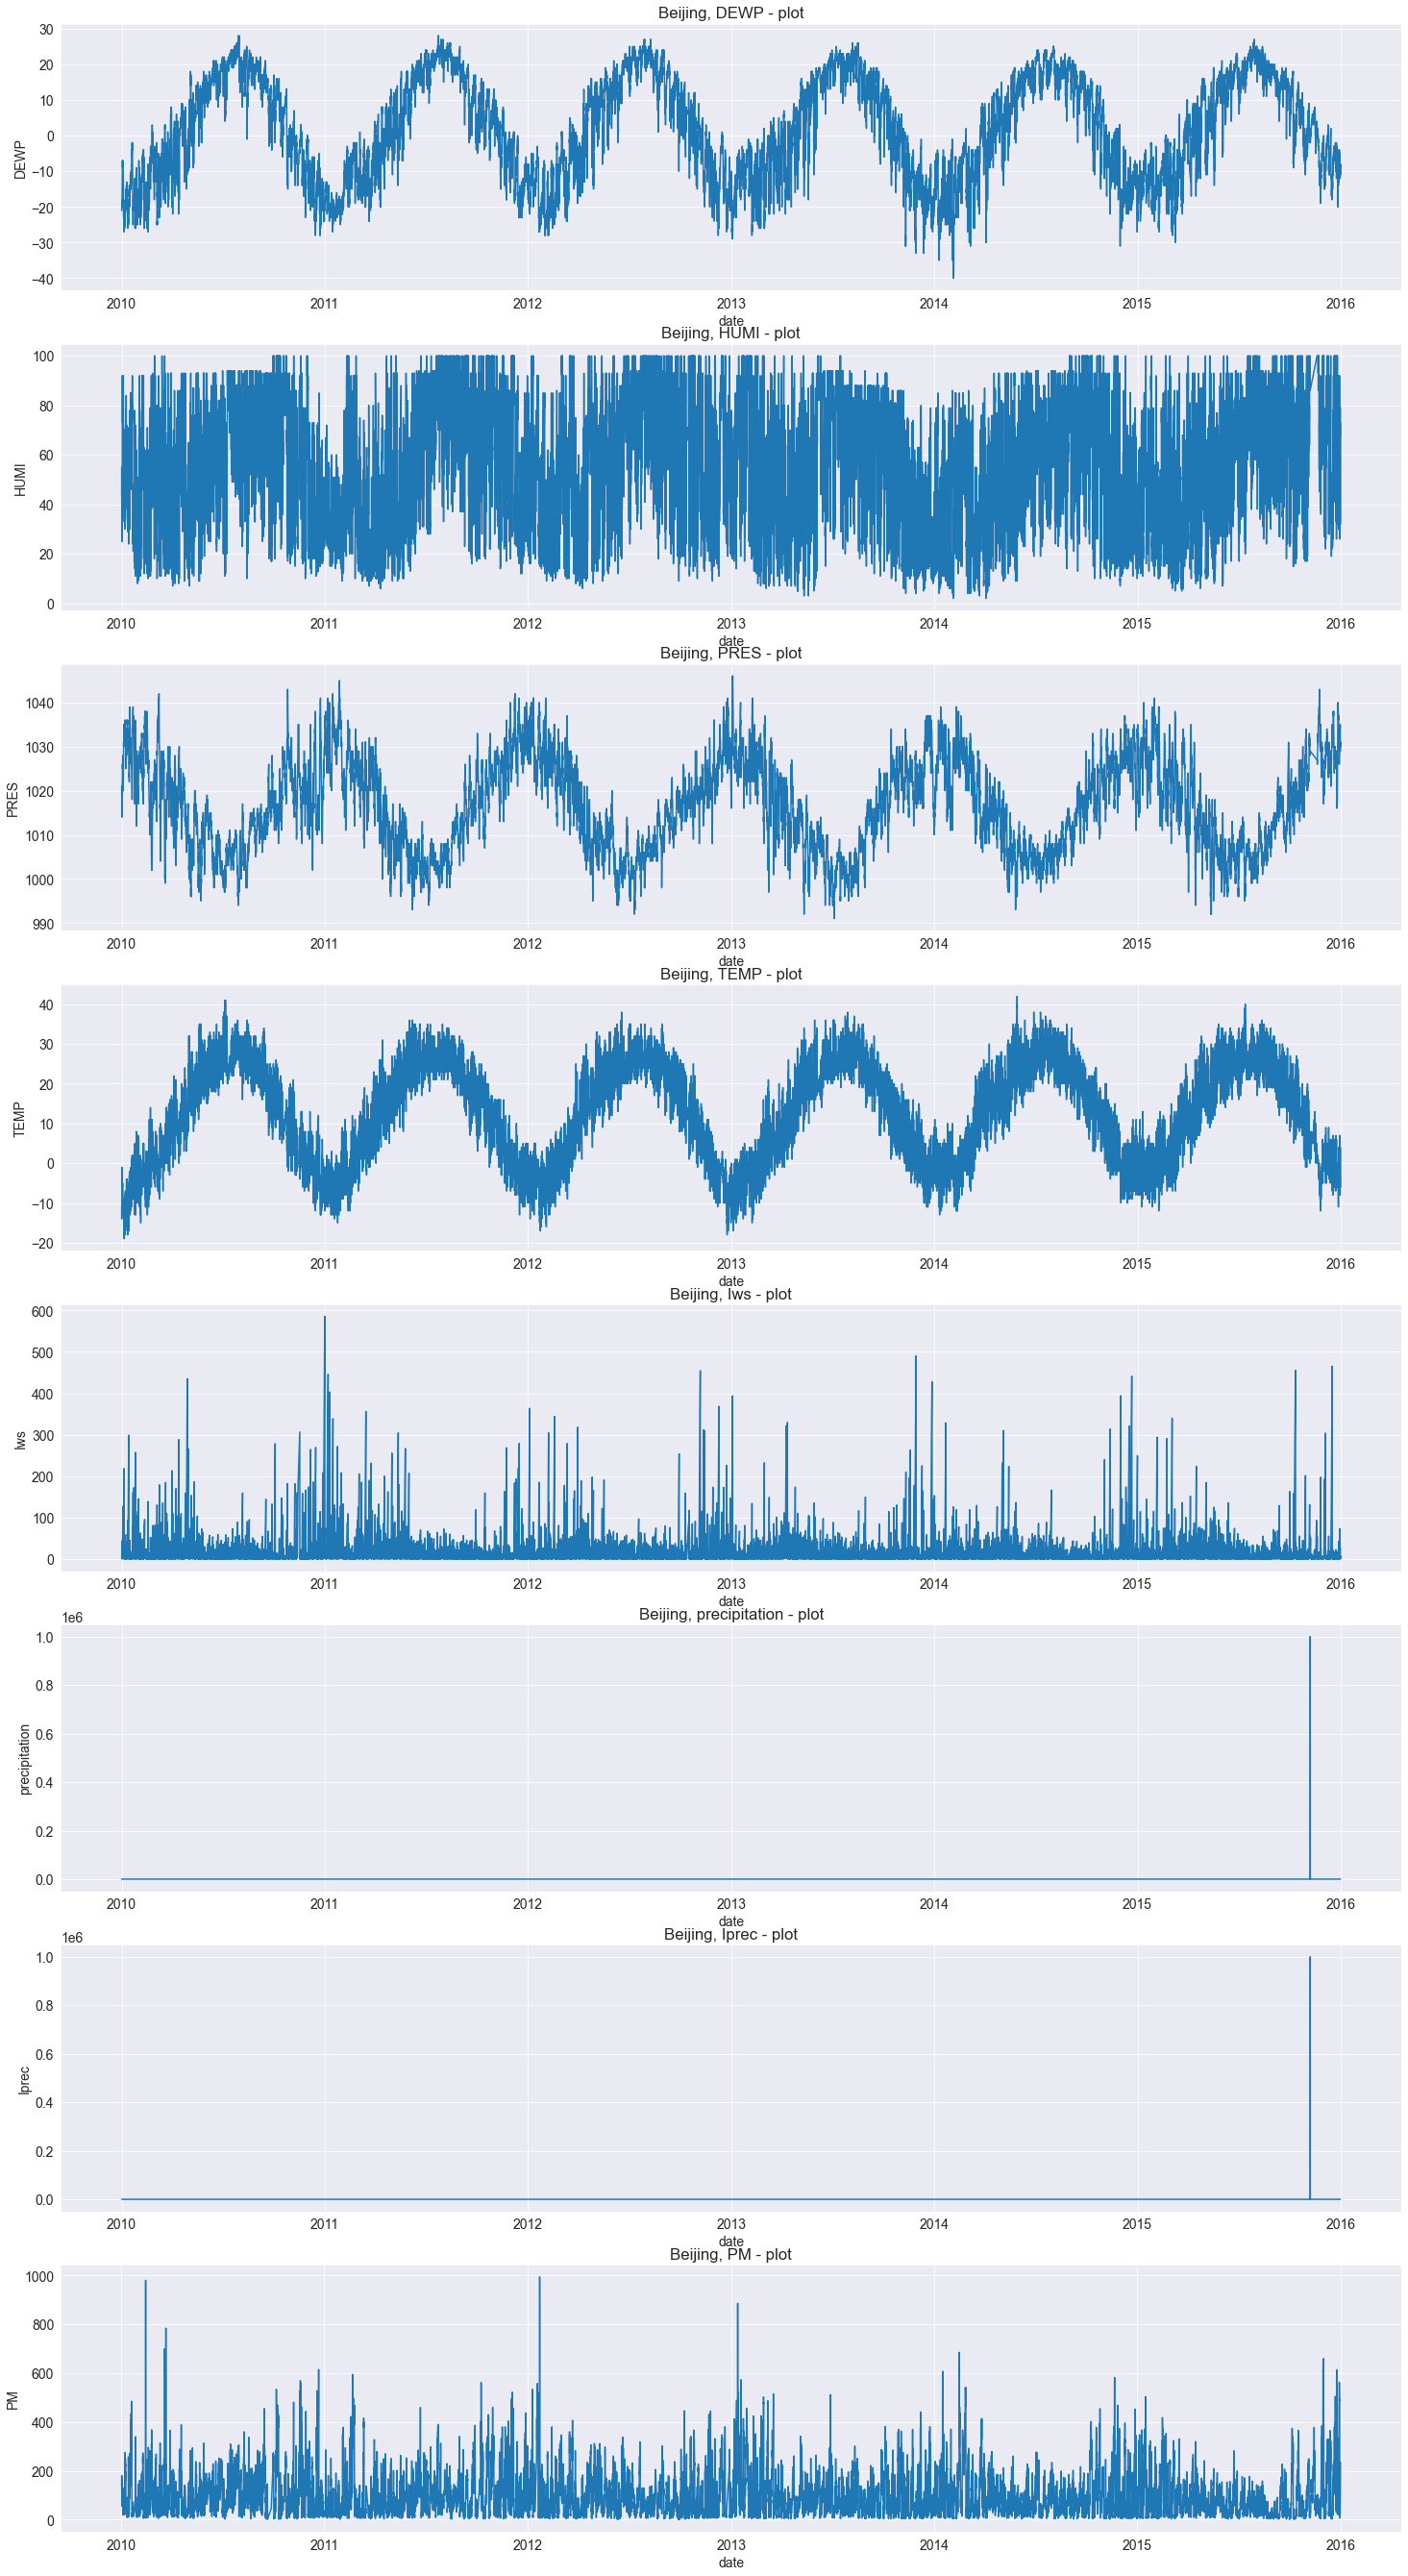

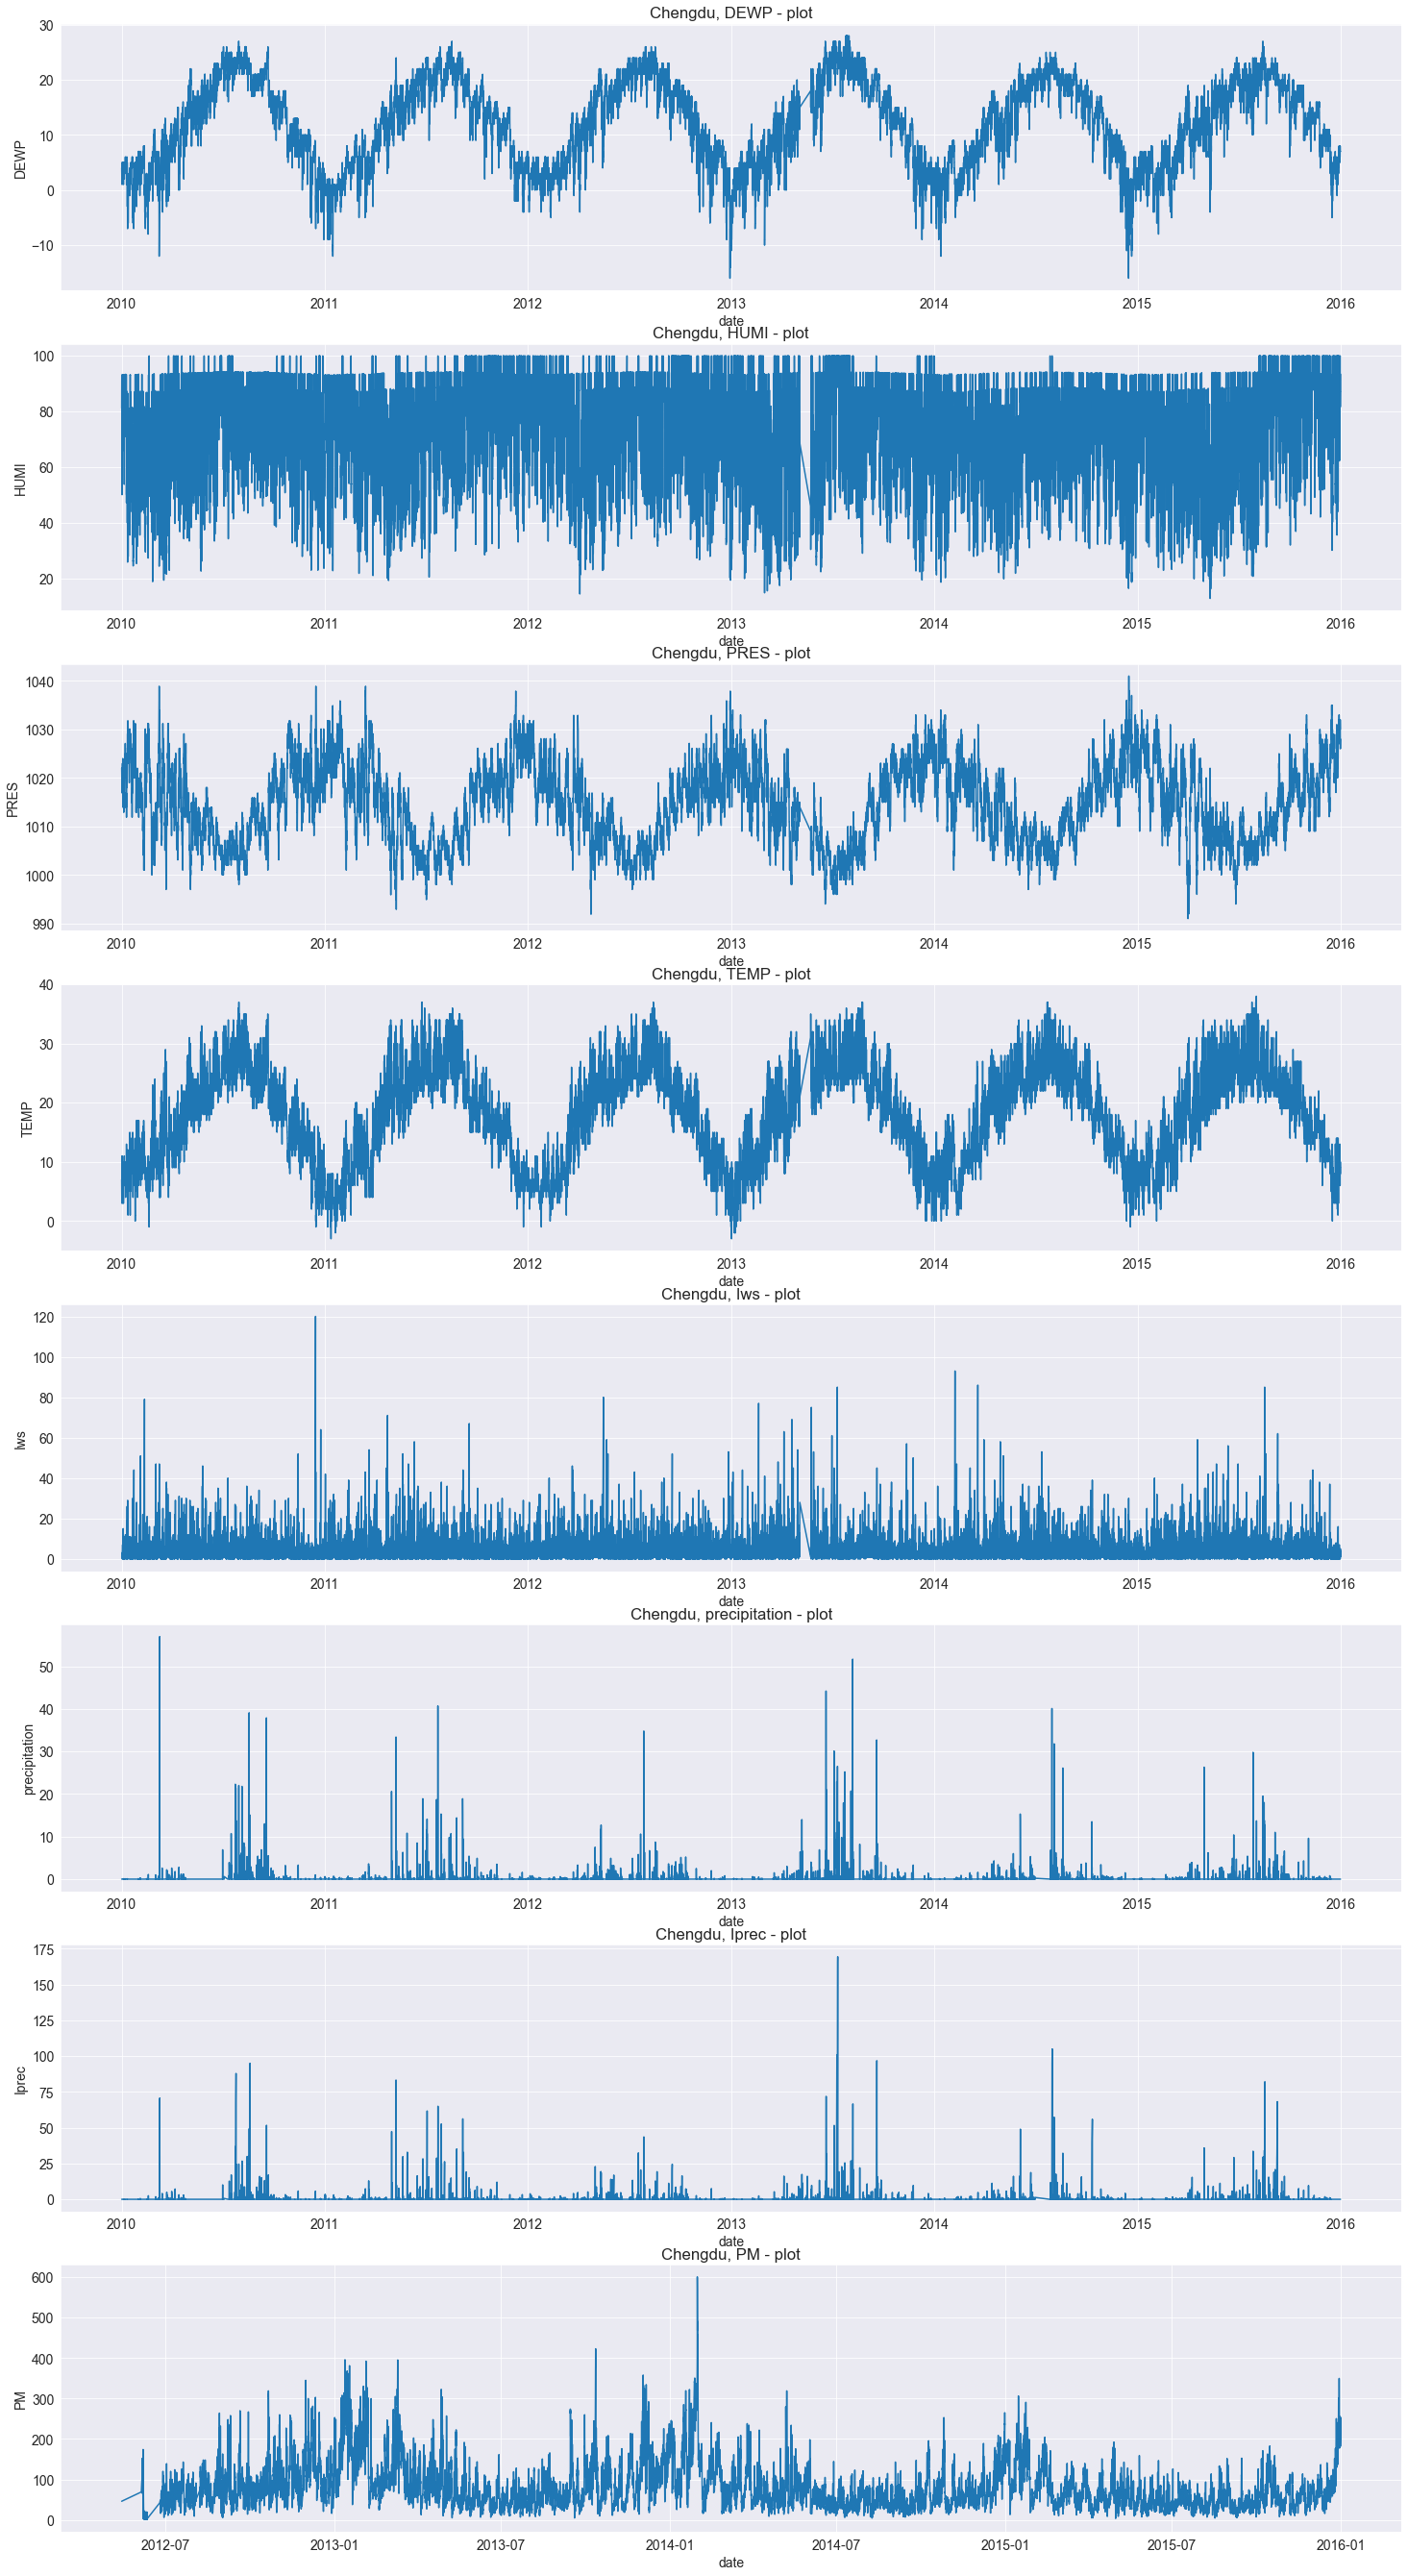

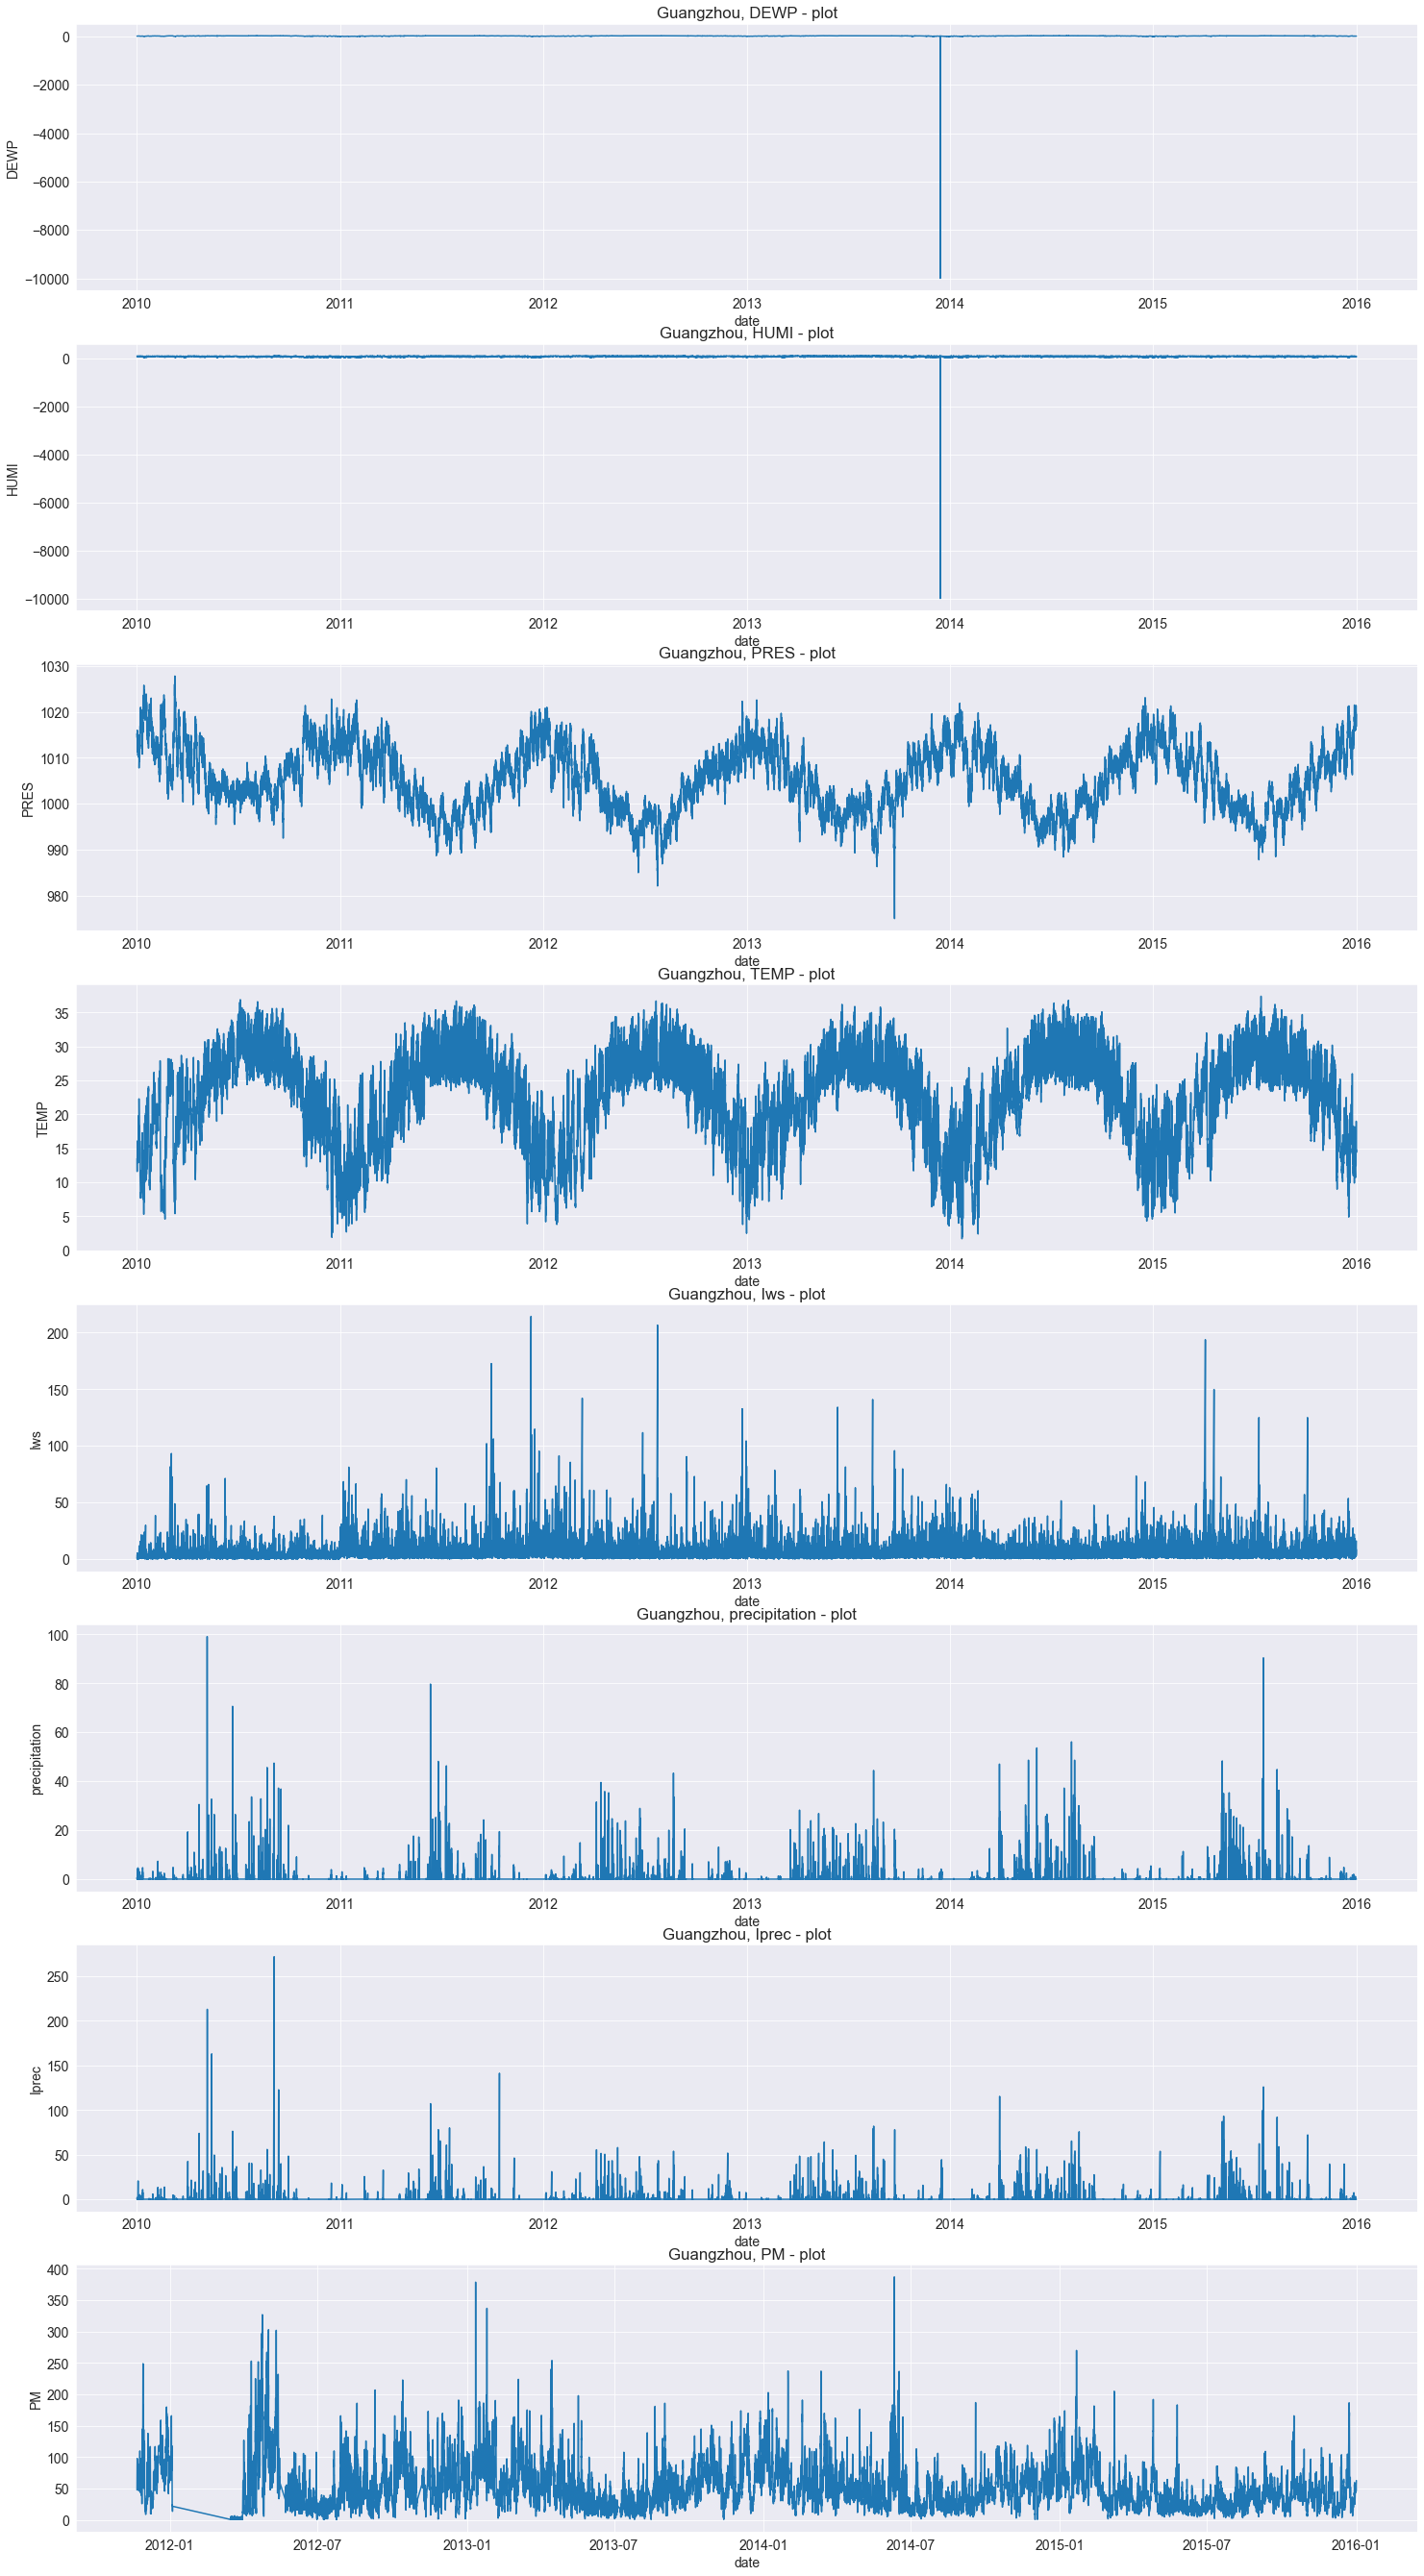

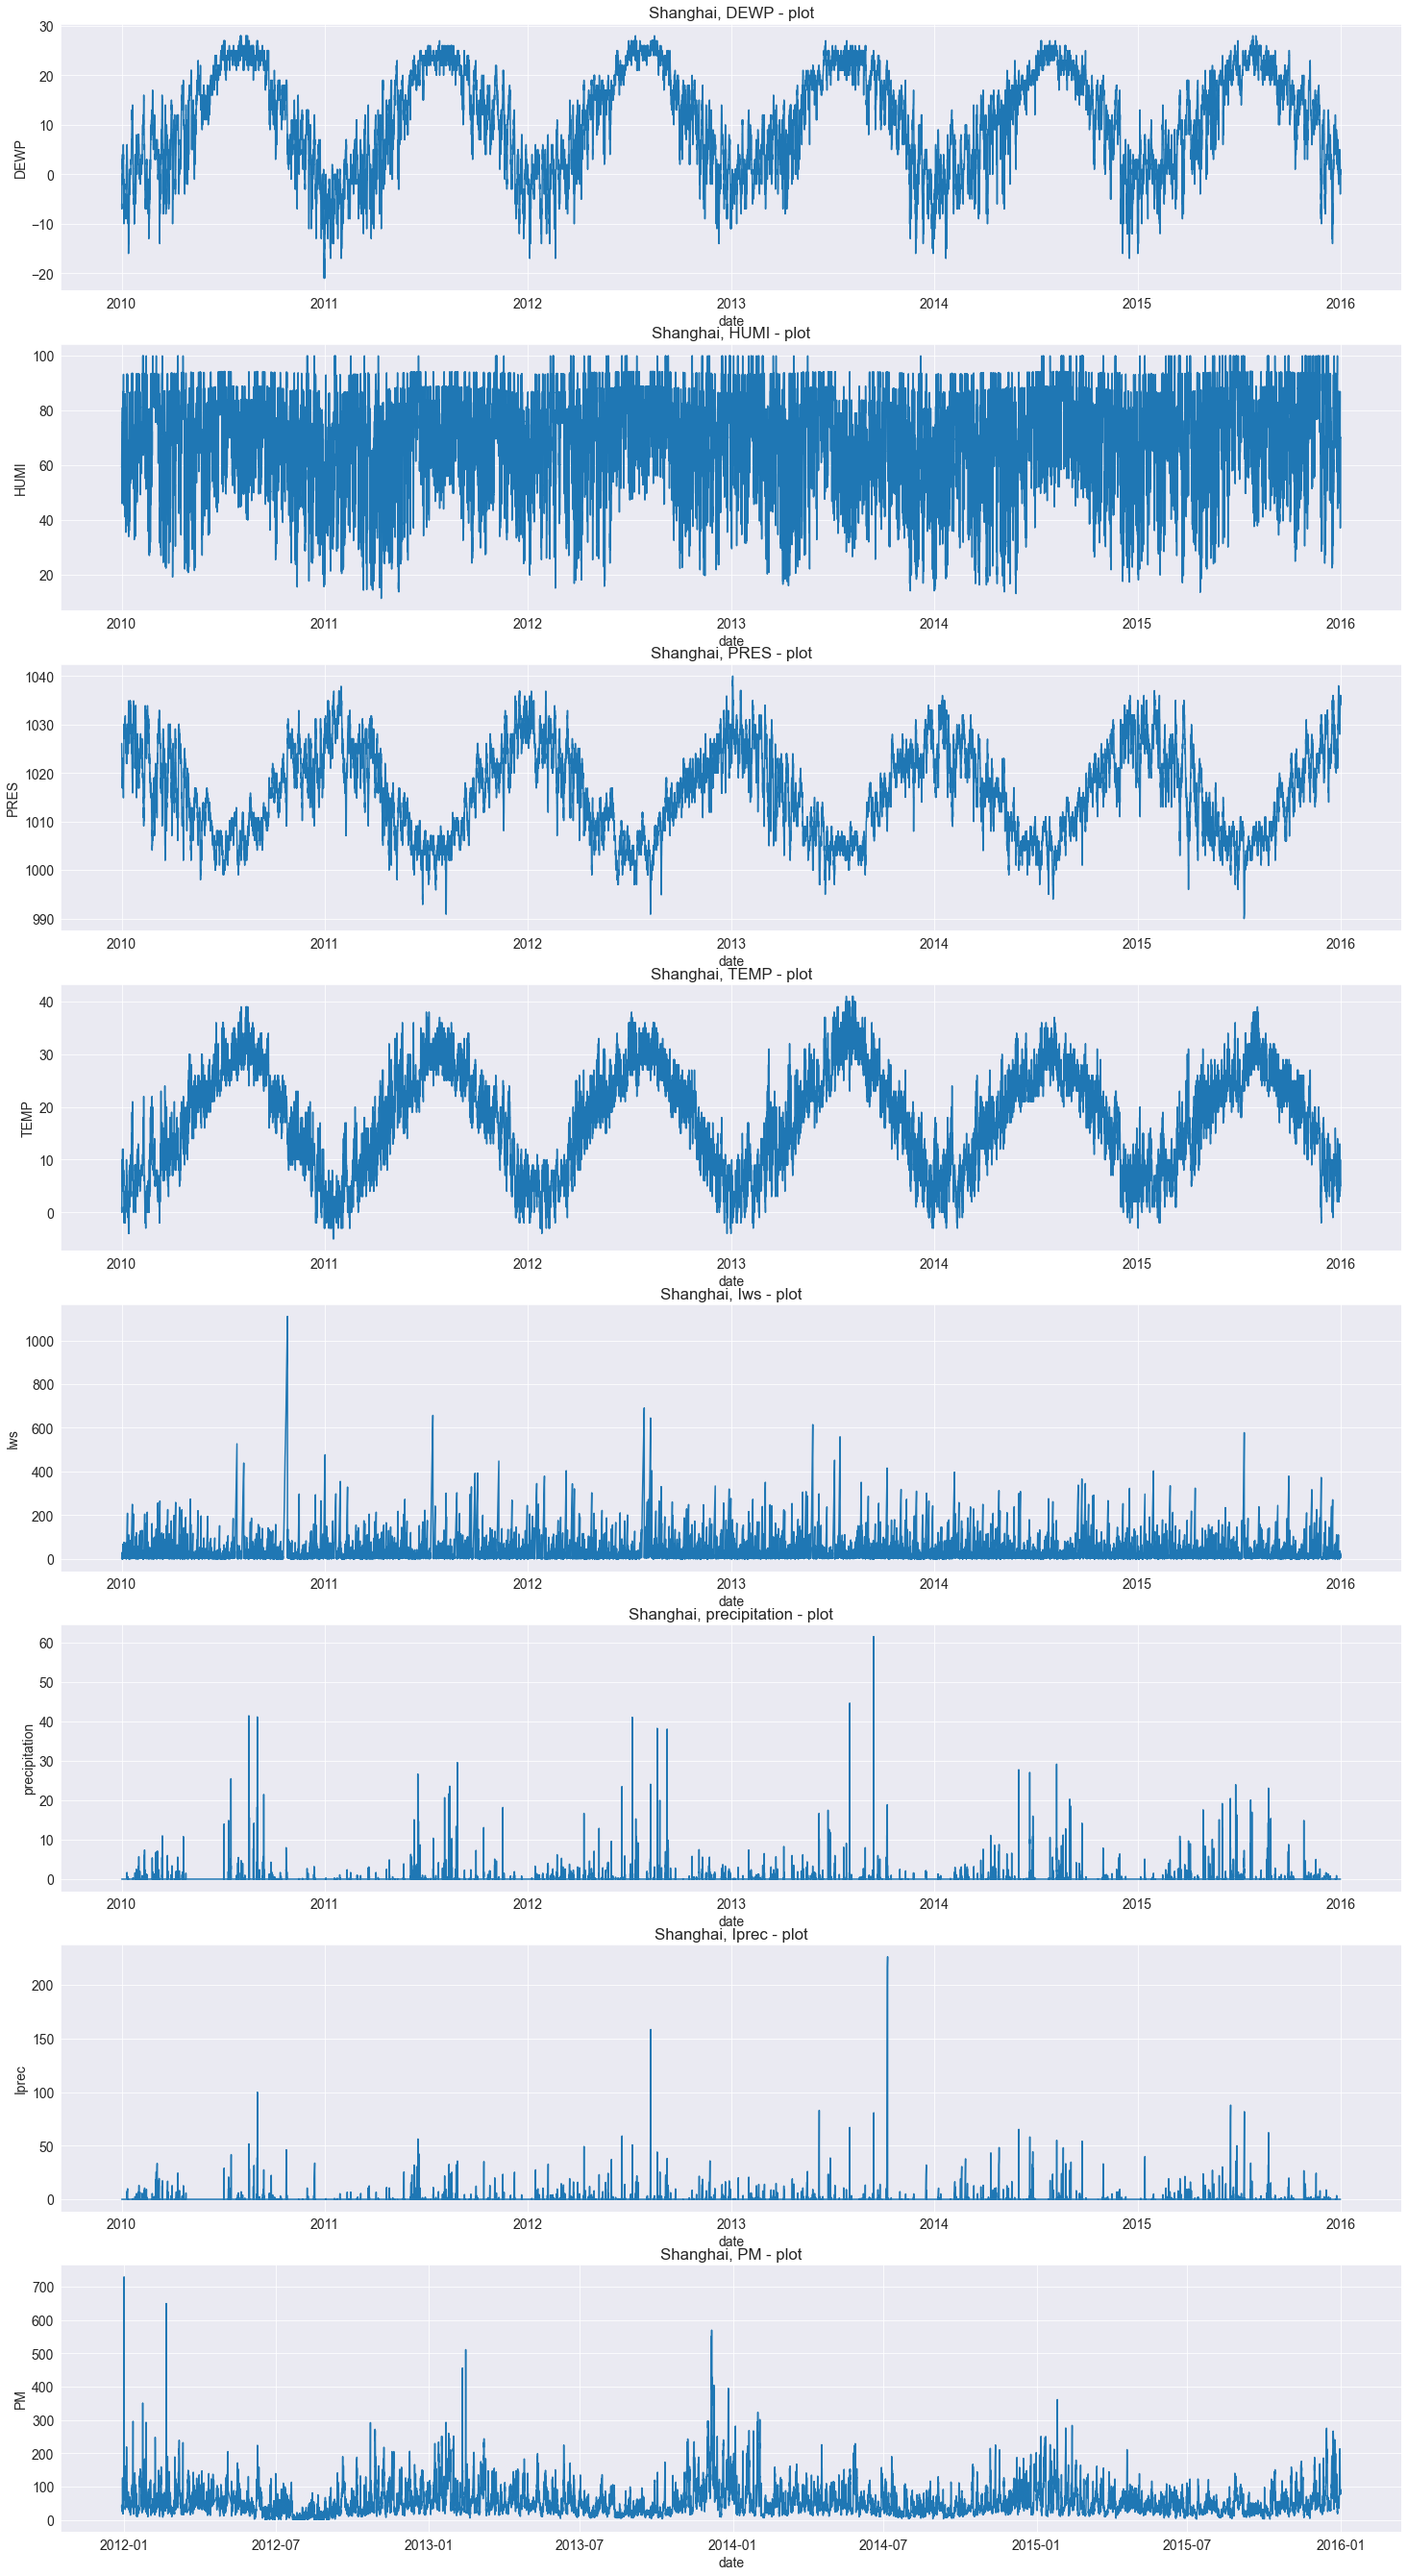

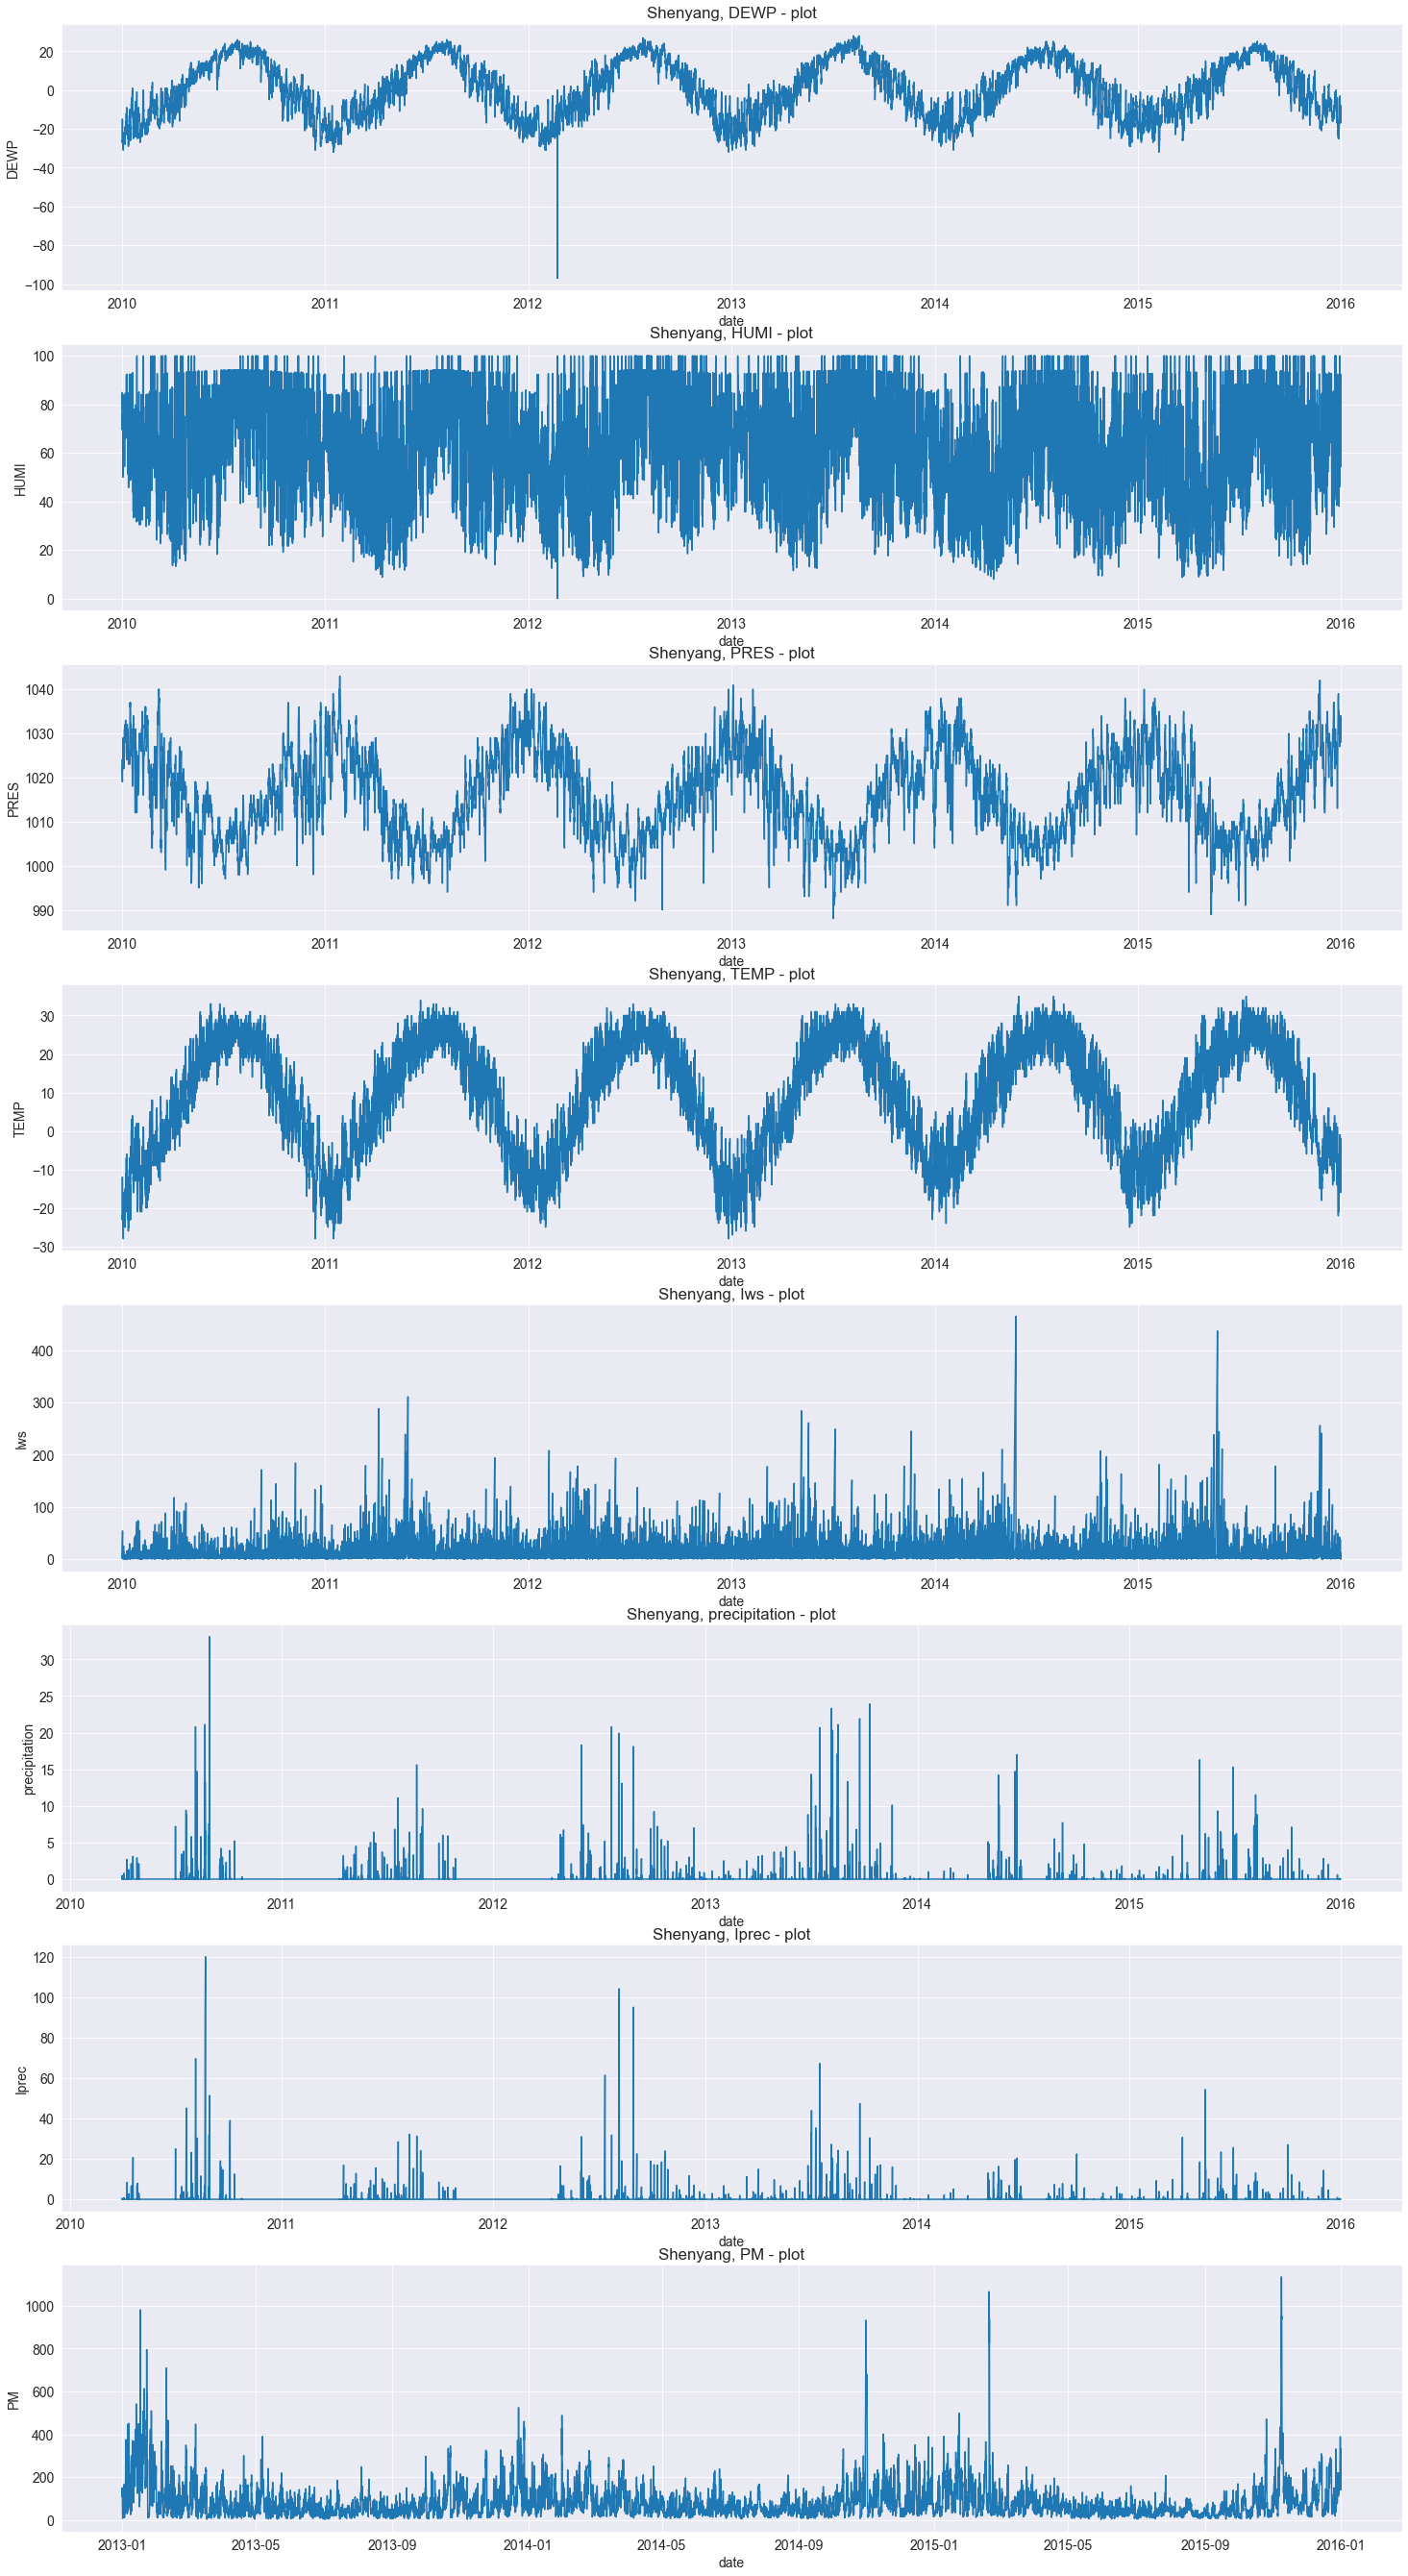

In [4]:
interesting_cols = ["DEWP", "HUMI", "PRES", "TEMP", "Iws", "precipitation", "Iprec", "PM"]
for file in os.listdir("data") : 
    df = pd.read_csv(f"data/{file}")
    df = preprocess_dataset(df)
    fig, axes = plt.subplots(nrows=len(interesting_cols), ncols=1, figsize=(25, 6 * len(interesting_cols)))
    for i,col in enumerate(interesting_cols):
        sns.lineplot(data = df, x = df.index, y = col, ax = axes[i]).set(title=f"{file[:-4]}, {col} - plot")
    plt.show()

## First insights : 

* Some problems in the Beijing dataset (precipitation and cumulated precipitation both exploded) and Guangzhou dataset (Dew Point and Humidity exploded); I'm gonna look at those particular plots and present them once more;

* Some missing values appeared in the calculated PM2.5 variable; it is also not available for every time frame; **it will result in selecting a test city in Problem 2b - Beijing has the data from 2010 till 2015, so I will select this particular city as a test set.**

* Temperature seems correlated with Pressure and Dew Point; all of those variable seems seasonal, with yearly seasonality (perfectly justifiable).

Max precipitation in Beijing : 999990.0 for 2015-11-07 13:00:00
Min Dew Point in Guangzhou : -9999.0 for 2011-07-25 19:00:00
Min Humidity in Guangzhou : -9999.0 for 2010-09-03 09:00:00


[Text(0.5, 1.0, 'Guangzhou, HUMI - plot')]

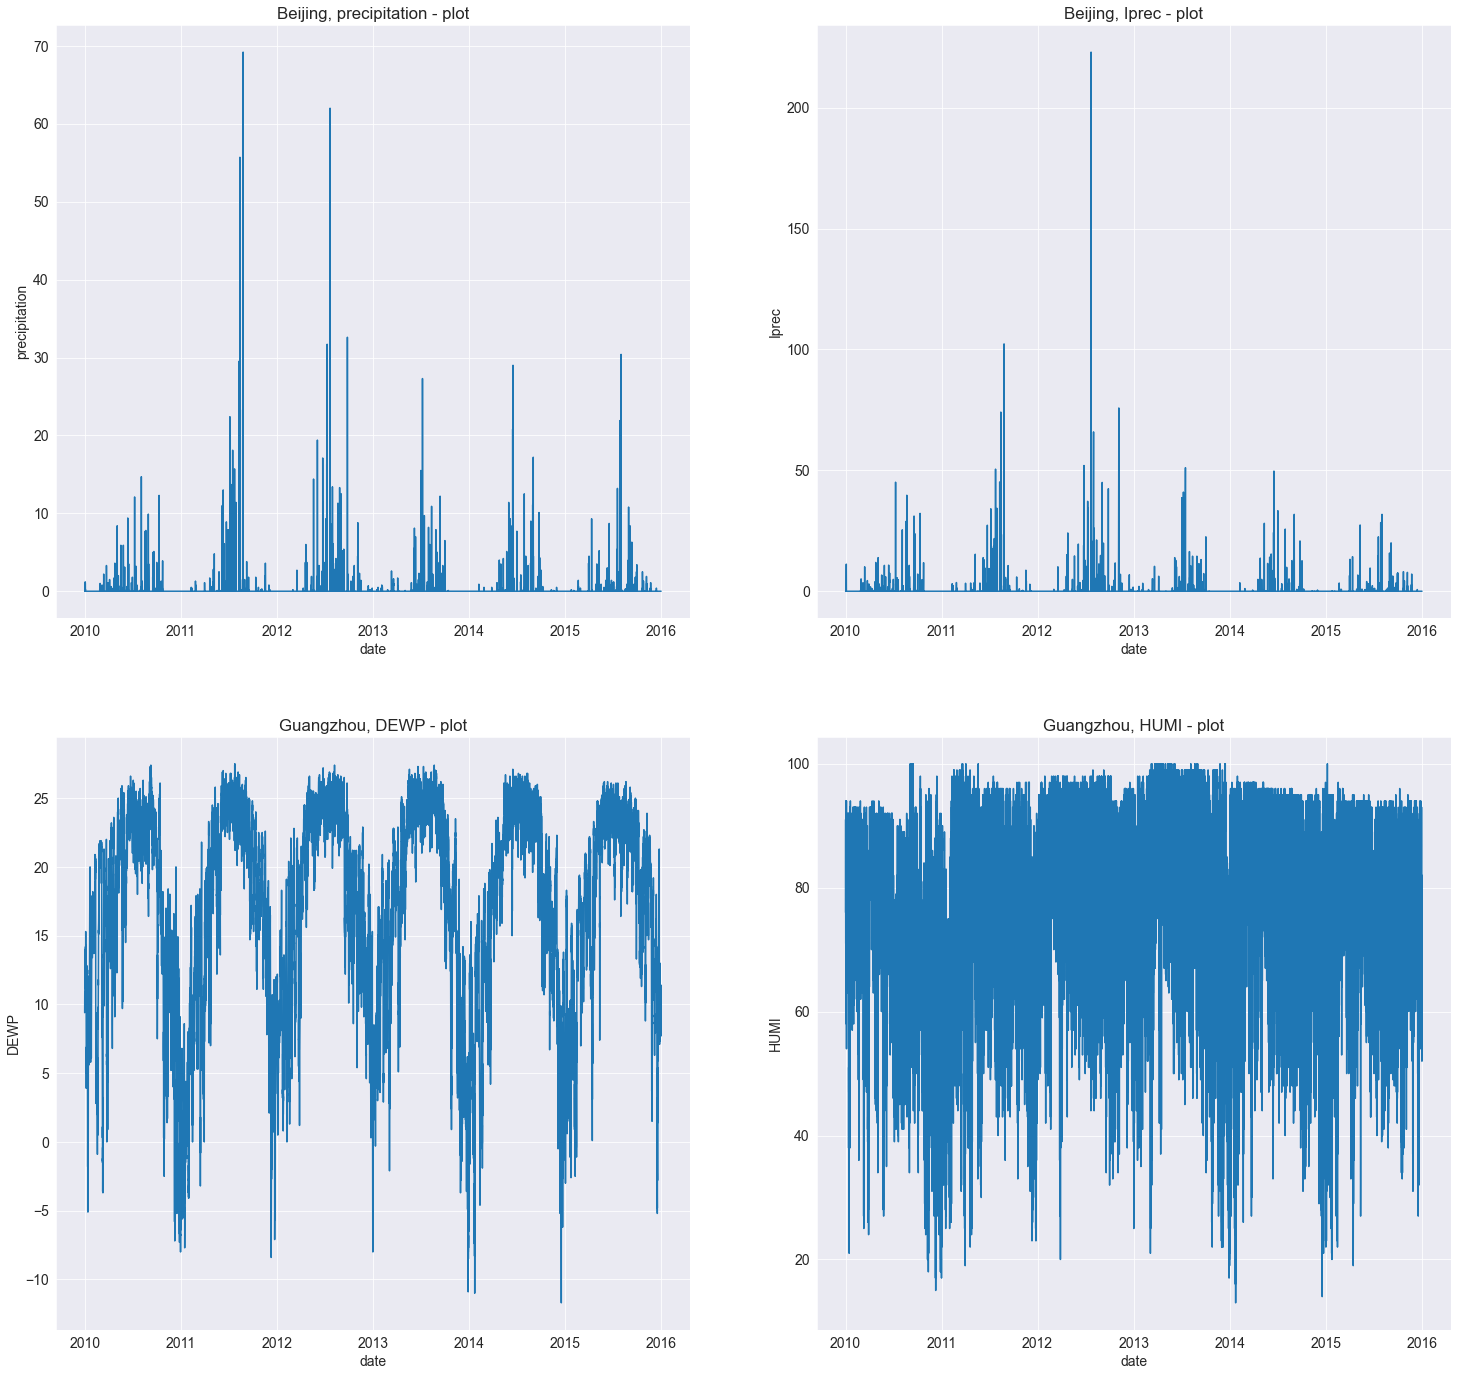

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 6 * 4))
df_beijing = pd.read_csv("data/Beijing.csv")
df_beijing = preprocess_dataset(df_beijing)
print(f"Max precipitation in Beijing : {df_beijing['precipitation'].max()} for {df_beijing.index[df_beijing['precipitation'].argmax()]}")
df_beijing = df_beijing.loc[df_beijing["precipitation"] != df_beijing["precipitation"].max(), :]

df_guangzhou = pd.read_csv("data/Guangzhou.csv")
df_guangzhou = preprocess_dataset(df_guangzhou)
print(f"Min Dew Point in Guangzhou : {df_guangzhou['DEWP'].min()} for {df_guangzhou.index[df_guangzhou['DEWP'].argmax()]}")
print(f"Min Humidity in Guangzhou : {df_guangzhou['HUMI'].min()} for {df_guangzhou.index[df_guangzhou['HUMI'].argmax()]}")

df_guangzhou = df_guangzhou.loc[df_guangzhou["DEWP"] != df_guangzhou["DEWP"].min(), :]
df_guangzhou = df_guangzhou.loc[df_guangzhou["HUMI"] != df_guangzhou["HUMI"].min(), :]

sns.lineplot(data = df_beijing, x = df_beijing.index, y = "precipitation", ax = axes[0,0]).set(title=f"Beijing, precipitation - plot")
sns.lineplot(data = df_beijing, x = df_beijing.index, y = "Iprec", ax = axes[0,1]).set(title=f"Beijing, Iprec - plot")
sns.lineplot(data = df_guangzhou, x = df_guangzhou.index, y = "DEWP", ax = axes[1,0]).set(title=f"Guangzhou, DEWP - plot")
sns.lineplot(data = df_guangzhou, x = df_guangzhou.index, y = "HUMI", ax = axes[1,1]).set(title=f"Guangzhou, HUMI - plot")


## Another visualizations :

Additionally, I would like to know what is the distribution of the wind direction in cities



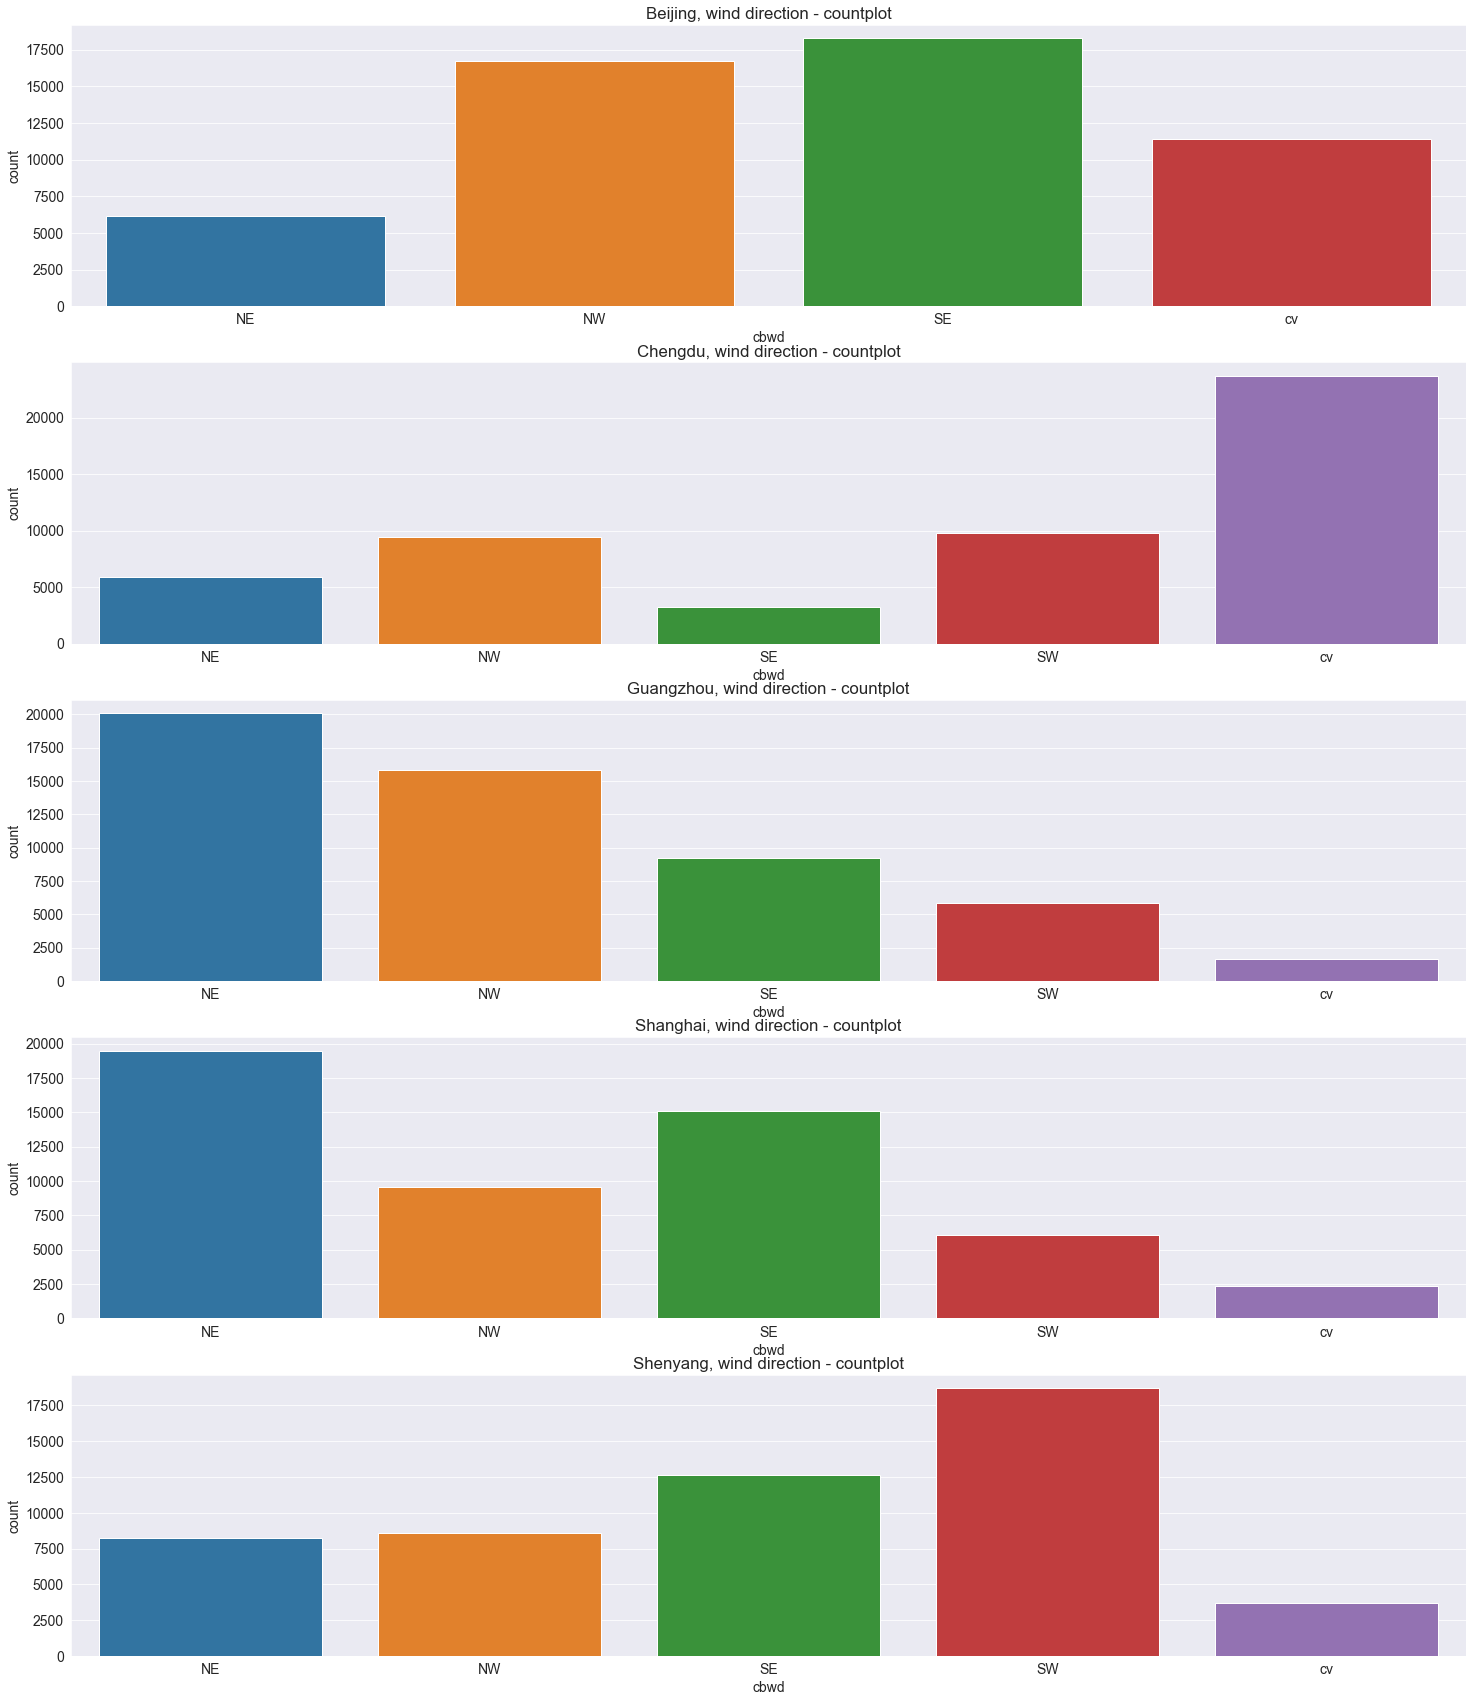

In [6]:
fig, axes = plt.subplots(nrows=len(os.listdir("data")), ncols=1, figsize=(25, 6 * len(os.listdir("data"))))
for i,file in enumerate(os.listdir("data")): 
    df = pd.read_csv(f"data/{file}")
    df = preprocess_dataset(df)
    sns.countplot(data = df.sort_values(by = "cbwd"), x="cbwd", ax = axes[i]).set(title=f"{file[:-4]}, wind direction - countplot")

## Another insights : 

* In Beijing, there was no south-west wind direction; the wind goes mostly to north-west or south-east (so opposite directions)
* In Chengdu, there is mostly west direction of wind; this city has also the most CV values (which is probably placeholder for missing data, or no wind)

* In Guangzhou, the wind is mostly northern
* In Shanghai, the wind is mostly eastern
* And in Shenyang, the wind is mostly southern

* **As the directions are completely different in different cities, I decided to omit the wind direction variable in the Problem 2b.**

## Histogram for PM2.5 in Beijing

For the last section, I will plot the histogram of calculated PM2.5 level in Beijing.

C:\Users\Bartek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Bartek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

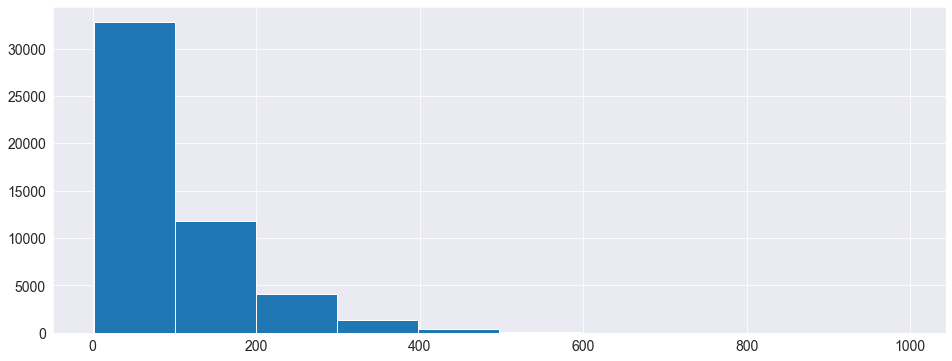

In [7]:
plt.hist(df_beijing["PM"])
plt.plot

## Insights :

* The distribution is right-skewed; I should have probably use this information to my advantage during Problem 2a, as the GARCH model can be affected by the skewed distributions; however, I will leave it for now.

## Next steps : 

* ANOVA analysis between cities - it could be interesting insight, whether the levels of PM2.5 differ based on location and I could probably use this information during the Problem 2b.